In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [46]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].nunique()
print(mouse_count)

249


In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on "Mouse ID" and "Timepoint"
duplicate_rows = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()


# Display the duplicate rows
print("Duplicate rows")
print(duplicate_rows)

Duplicate rows
['g989']


In [48]:
# Remove duplicates based on specific columns (e.g., "Mouse ID" and "Timepoint")
mouse_drop = mouse_study[~mouse_study["Mouse ID"].isin(duplicate_rows)]

# Display the cleaned DataFrame
print(mouse_drop.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [49]:
mouse_count = mouse_drop["Mouse ID"].nunique()
print(mouse_count)

248


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_group = mouse_drop.groupby('Drug Regimen')["Tumor Volume (mm3)"]
mean = regimen_group.mean()
median = regimen_group.median()
variance = regimen_group.var()
std_dev = regimen_group.std()
sem = regimen_group.sem()
mouse_summary = pd.DataFrame({'Mean': mean,'Median': median,'Variance': variance,'Standard Deviation': std_dev,'SEM': sem})
print(mouse_summary)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


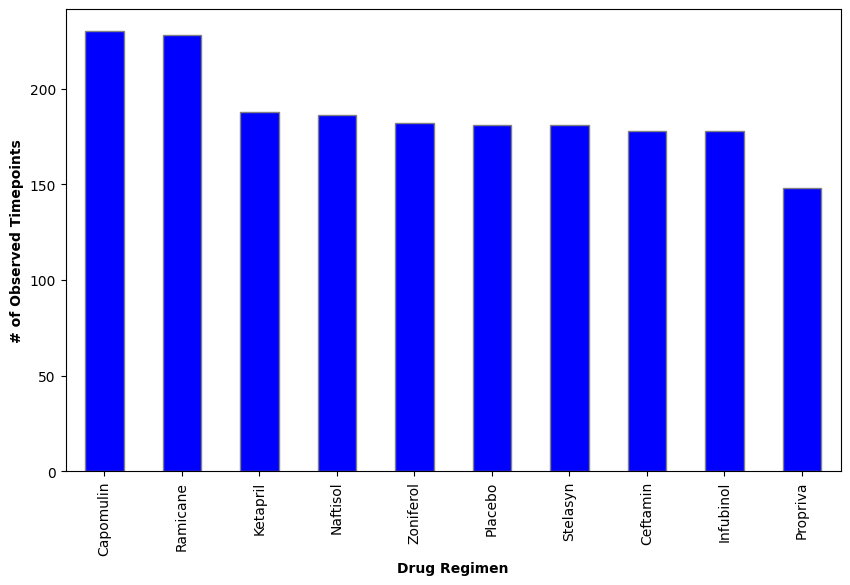

In [51]:
# Grouping the data by 'Drug Regimen' and counting the number of rows for each group
mouse_counts = mouse_drop.groupby('Drug Regimen').size()
mouse_counts = mouse_counts.sort_values(ascending =False)

# Plotting the bar chart using Pandas built-in plot function
mouse_counts.plot(kind='bar', color='blue', edgecolor='grey', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('# of Observed Timepoints', fontweight='bold')

# Display the plot
plt.show()

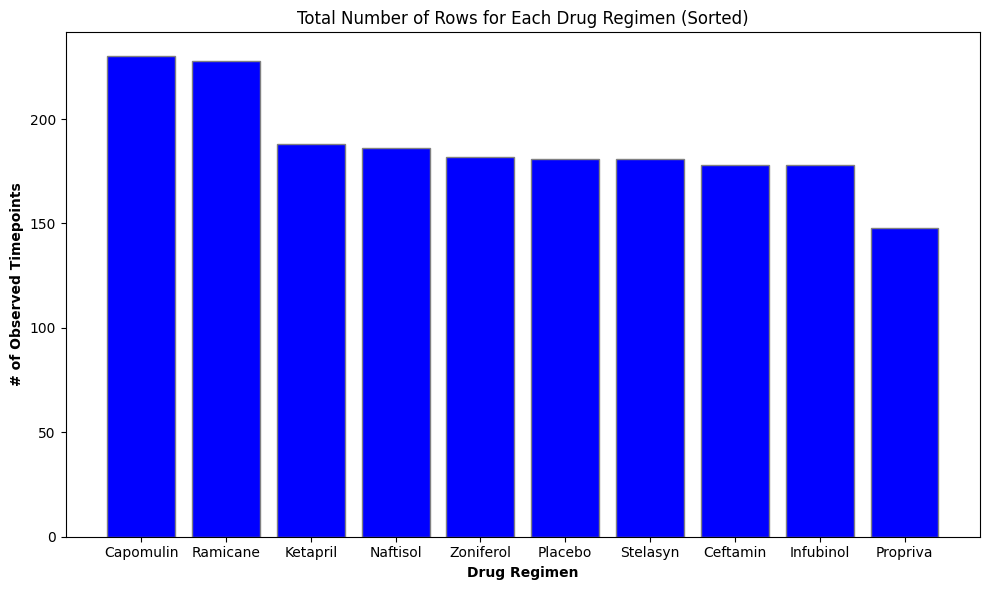

In [52]:
# Extracting drug regimens and corresponding counts
drug_regimens = mouse_counts.index
counts = mouse_counts.values

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts, color='blue', edgecolor='grey')
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('# of Observed Timepoints', fontweight='bold')
plt.title('Total Number of Rows for Each Drug Regimen (Sorted)')
plt.tight_layout()
plt.show()

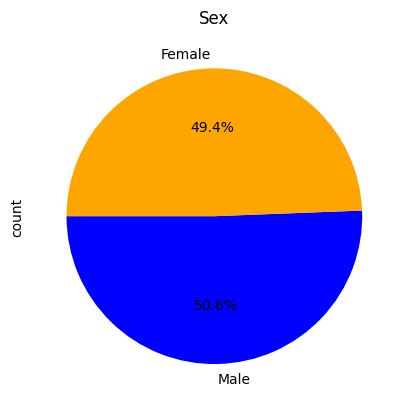

In [53]:
sex_distribution = mouse_study['Sex'].value_counts()

sex_distribution.plot(kind='pie',  autopct='%1.1f%%', startangle=180, colors=['blue', 'orange'])

plt.title('Sex')

plt.show()

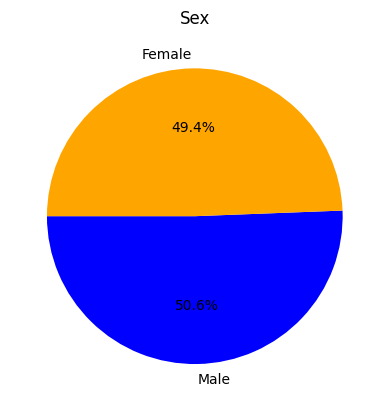

In [54]:
mouse_sex_distribution = mouse_study['Sex'].value_counts()

# Data to plot
labels = mouse_sex_distribution.index
sizes = mouse_sex_distribution.values
colors = ['blue', 'orange']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Sex')
plt.show()

In [55]:
#Get the last timepoint for each mouse
final_tp = mouse_study.groupby('Mouse ID')['Timepoint'].max()

#Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(final_tp, mouse_study, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter for only the treatment regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(treatment_regimens)]

In [56]:
# Put treatments into a list for the for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR for each treatment
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Print the results
    print(f"------------------------------------------------------")
    print(f"Results for {treatment}:")
    
    # Check for outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    if len(outliers) > 0:
        print(f"Potential outliers: {outliers}")
    else:
        print("No potential outliers")

------------------------------------------------------
Results for Capomulin:
No potential outliers
------------------------------------------------------
Results for Ramicane:
No potential outliers
------------------------------------------------------
Results for Infubinol:
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------
Results for Ceftamin:
No potential outliers


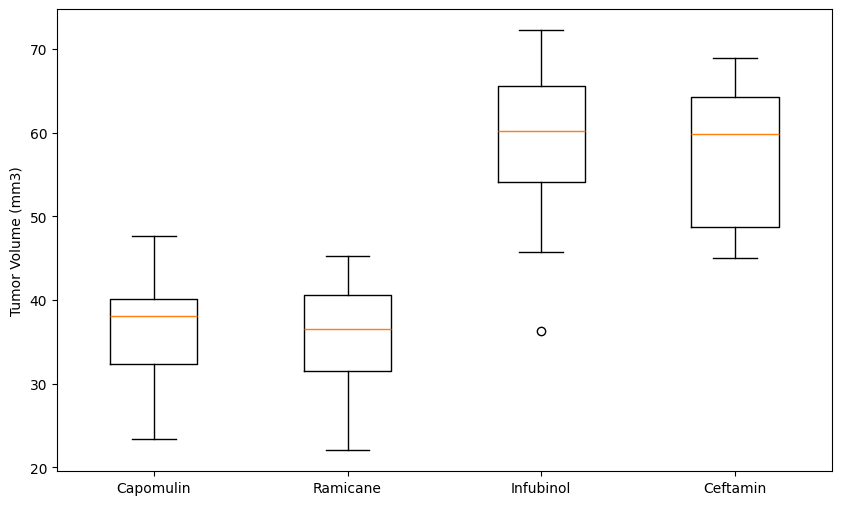

In [57]:
tumor_data = [final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values 
                     for treatment in treatments]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_data, labels=treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

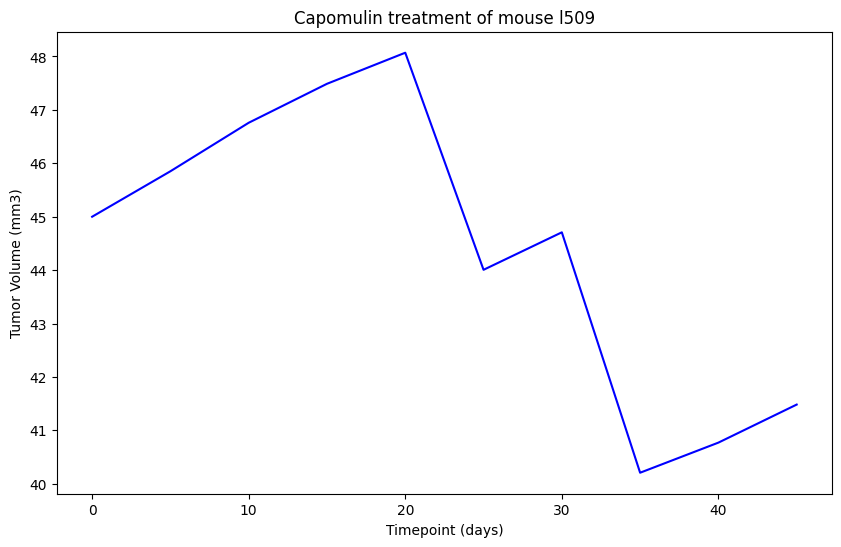

In [58]:
capomulin_data = mouse_study[mouse_study['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'  # mouse ID with capomulin
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue', linestyle='-')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

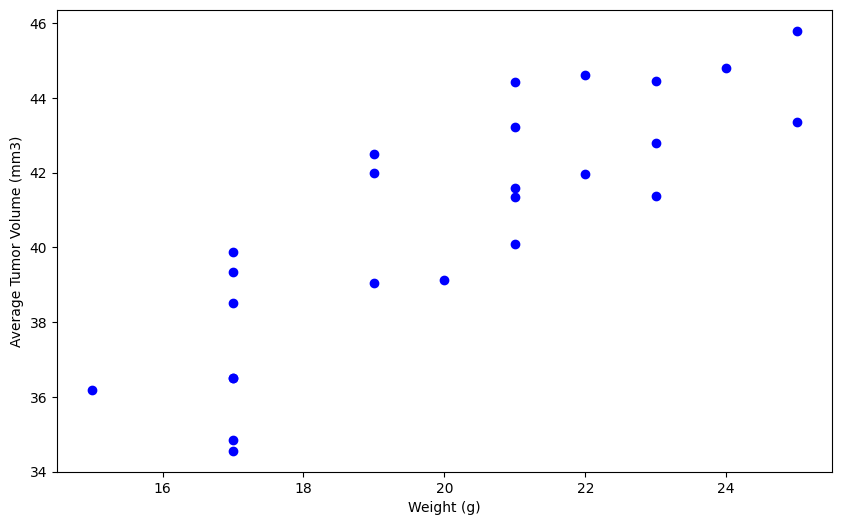

In [59]:
tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [60]:
correlation_coefficient = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0]
print("Correlation Coefficient:", correlation_coefficient)


slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

Correlation Coefficient: 0.8419363424694721
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


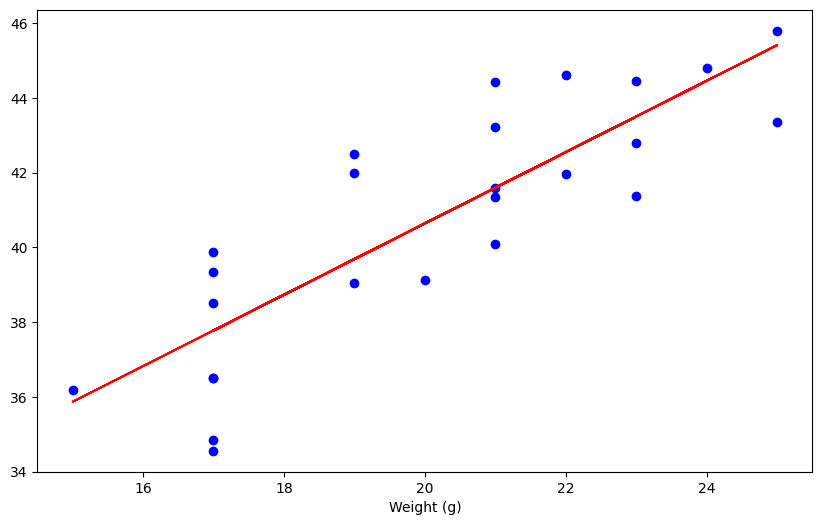

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')

mean_x = merged_data['Weight (g)'].mean()
mean_y = merged_data['Tumor Volume (mm3)'].mean()


numerator = sum((merged_data['Weight (g)'] - mean_x) * (merged_data['Tumor Volume (mm3)'] - mean_y))
denominator = sum((merged_data['Weight (g)'] - mean_x) ** 2)
m = numerator / denominator


b = mean_y - m * mean_x

plt.plot(merged_data['Weight (g)'], m * merged_data['Weight (g)'] + b, color='red')


plt.show()